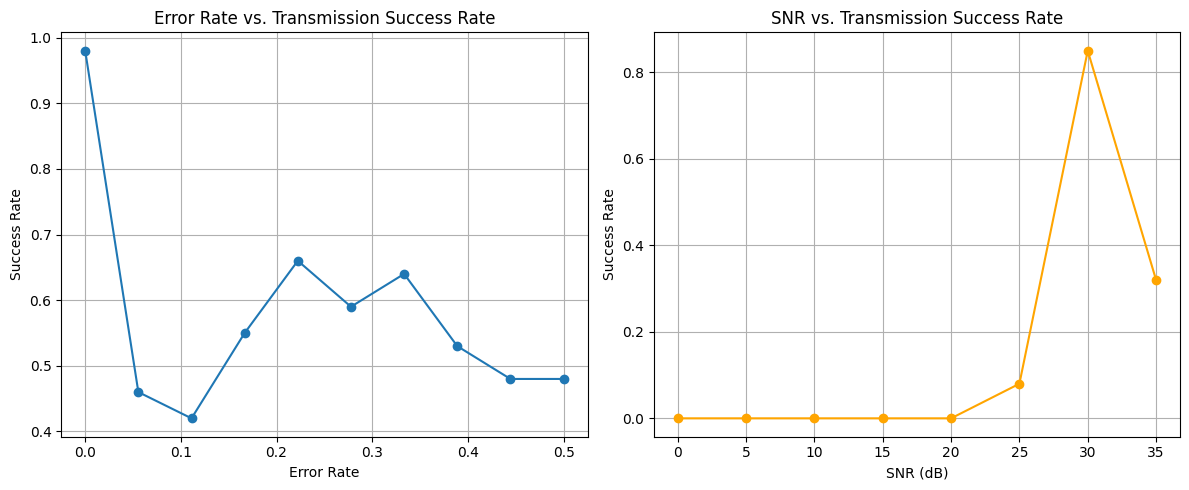

Plaintext: Encrypting messages using AES
Encrypted ciphertext (hex): c8a4c91935855ea4c500e1972dfa5052b82ec665bb148eecc7ebeec2c1
Decrypted Plaintext (after last trial): False
Total errors encountered during the last transmission: 1


In [1]:
from Crypto.Cipher import AES
from secrets import token_bytes
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Key generation 
key = token_bytes(16)

def encrypt(msg):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce    
    ciphertext, tag = cipher.encrypt_and_digest(msg.encode('ascii'))
    return nonce, ciphertext, tag

def decrypt(nonce, ciphertext, tag):
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    try:
        cipher.verify(tag)
        return plaintext.decode('ascii')
    except ValueError:
        return False

def awgn_channel(signal, snr_dB):
    """ Simulate an AWGN channel by adding noise to the signal. """
    snr = 10 ** (snr_dB / 10)  # Convert dB to a linear scale
    signal_power = np.mean(np.abs(signal)**2)  # Calculate signal power
    noise_power = signal_power / snr  # Calculate noise power
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)  # Generate Gaussian noise
    return signal + noise.astype(np.uint8)  # Add noise to the signal and return

def transmit(nonce, ciphertext, tag, error_rate=0, jam_steps=[], snr_dB=30):
    """ Simulate transmission, with a chance of introducing errors and jamming. """
    current_time = int(time.time() * 100)  # Get current time in milliseconds
    frequency = get_frequency(current_time)

    if current_time % 100 in jam_steps:  # Check if the current time step is jammed
        return nonce, b'\x00' * len(ciphertext), tag, 0  # Transmit zeroed ciphertext if jammed
    
    # Add noise to the ciphertext using AWGN channel model
    noisy_ciphertext = awgn_channel(np.frombuffer(ciphertext, dtype=np.uint8), snr_dB)
    
    # Track errors introduced during transmission
    errors = 0
    if random.random() < error_rate:
        # Introduce a simple error (e.g., corrupt the noisy ciphertext)
        corrupted_ciphertext = bytearray(noisy_ciphertext)
        corrupted_byte_index = random.randint(0, len(corrupted_ciphertext) - 1)
        corrupted_ciphertext[corrupted_byte_index] ^= 0xFF  # Flip a random byte
        errors += 1  # Count the error
        return nonce, bytes(corrupted_ciphertext), tag, errors
    
    return nonce, bytes(noisy_ciphertext), tag, errors

def get_frequency(current_time):
    """ Simulate frequency hopping based on time. """
    frequencies = [2.4, 2.45, 2.5, 2.55]  # List of possible frequencies (in GHz)
    return frequencies[(current_time // 100) % len(frequencies)]  # Select frequency based on time step

def receive(nonce, ciphertext, tag):
    """ Simulate receiving the message and attempting decryption. """
    return decrypt(nonce, ciphertext, tag)

# Directly input the message string
msg = "Encrypting messages using AES"

# Performance metrics collection
success_rates = []
error_rates = np.linspace(0, 0.5, 10)  # Varying error rates from 0% to 50%
snr_values = np.arange(0, 40, 5)  # Varying SNR from 0 to 100 dB
jam_steps = [0, 1, 2, 5, 6, 8, 10]  # Specify the time steps when jamming occurs
num_trials = 100  # Number of trials for each error rate

# Evaluate transmission success rates across different error rates
for error_rate in error_rates:
    successful_transmissions = 0
    total_errors = 0
    for _ in range(num_trials):
        if msg:
            nonce, ciphertext, tag = encrypt(msg)
            nonce_transmitted, ciphertext_transmitted, tag_transmitted, errors = transmit(nonce, ciphertext, tag, error_rate, jam_steps, snr_dB=30)
            plaintext = receive(nonce_transmitted, ciphertext_transmitted, tag_transmitted)
            total_errors += errors
            if plaintext:  # Count successful decryptions
                successful_transmissions += 1
    success_rates.append(successful_transmissions / num_trials)

# Plot Error Rate vs. Transmission Success Rate
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(error_rates, success_rates, marker='o')
plt.title('Error Rate vs. Transmission Success Rate')
plt.xlabel('Error Rate')
plt.ylabel('Success Rate')
plt.grid()

# Evaluate transmission success rates across different SNR values
success_rates_snr = []
for snr in snr_values:
    successful_transmissions = 0
    total_errors = 0
    for _ in range(num_trials):
        if msg:
            nonce, ciphertext, tag = encrypt(msg)
            nonce_transmitted, ciphertext_transmitted, tag_transmitted, errors = transmit(nonce, ciphertext, tag, error_rate=0.1, jam_steps=jam_steps, snr_dB=snr)
            plaintext = receive(nonce_transmitted, ciphertext_transmitted, tag_transmitted)
            total_errors += errors
            if plaintext:  # Count successful decryptions
                successful_transmissions += 1
    success_rates_snr.append(successful_transmissions / num_trials)

# Plot SNR vs. Transmission Success Rate
plt.subplot(1, 2, 2)
plt.plot(snr_values, success_rates_snr, marker='o', color='orange')
plt.title('SNR vs. Transmission Success Rate')
plt.xlabel('SNR (dB)')
plt.ylabel('Success Rate')
plt.grid()

plt.tight_layout()
plt.show()

# Print messages and errors
print(f'Plaintext: {msg}')
print(f'Encrypted ciphertext (hex): {ciphertext.hex()}')
print(f'Decrypted Plaintext (after last trial): {plaintext}')
print(f'Total errors encountered during the last transmission: {total_errors}')


Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check

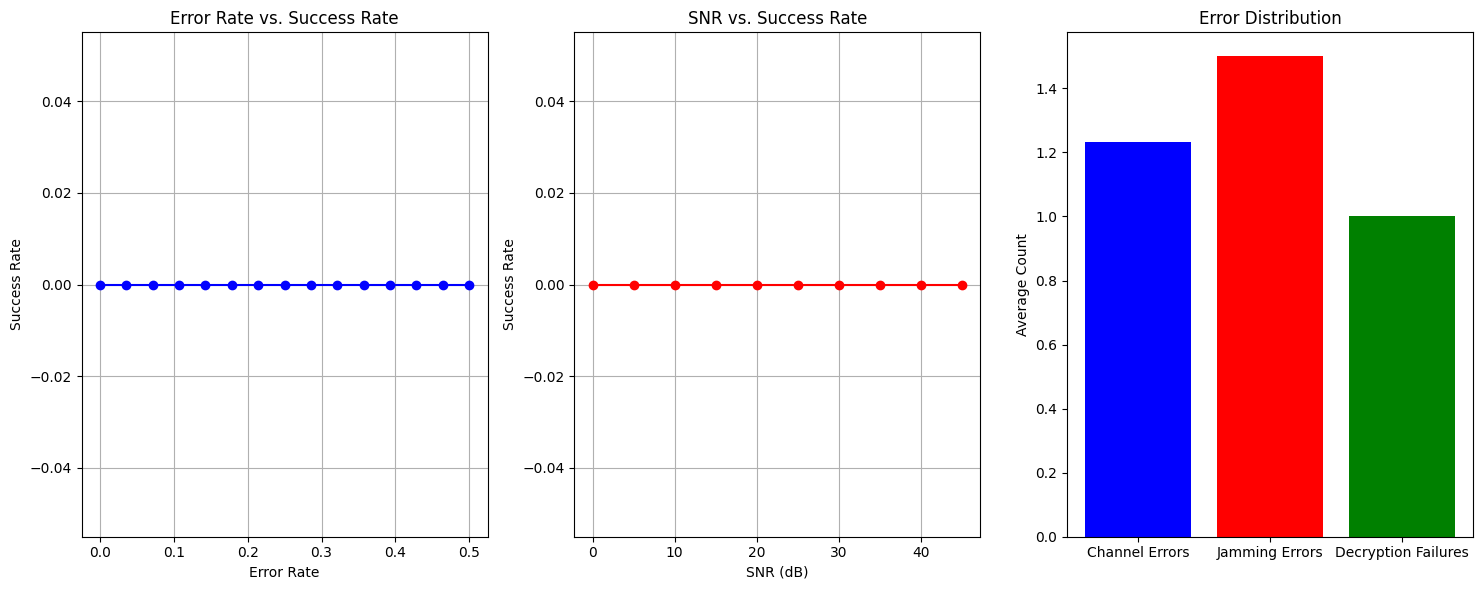


=== Simulation Summary ===
Original Message: Secure FHSS with AES-128
Message Length: 24 bytes (192 bits)
Average BER: 5.13e-02
Peak Success Rate: 0.0%
Worst Success Rate: 0.0%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from secrets import token_bytes
import random
import time
from collections import defaultdict
from typing import Tuple, List, Optional

class FHSSAESSimulator:
    def __init__(self, key_length: int = 16):
        """Initialize the FHSS simulator with AES encryption"""
        self.key = token_bytes(key_length)
        self.frequencies = [2.4, 2.45, 2.5, 2.55]  # GHz
        self.performance_metrics = defaultdict(list)
        
    def encrypt(self, msg: str) -> Tuple[bytes, bytes, bytes]:
        """Encrypt message using AES in EAX mode"""
        cipher = AES.new(self.key, AES.MODE_EAX)
        nonce = cipher.nonce
        ciphertext, tag = cipher.encrypt_and_digest(msg.encode('utf-8'))
        return nonce, ciphertext, tag
    
    def decrypt(self, nonce: bytes, ciphertext: bytes, tag: bytes) -> Optional[str]:
        """Decrypt message and verify integrity"""
        cipher = AES.new(self.key, AES.MODE_EAX, nonce=nonce)
        try:
            plaintext = cipher.decrypt_and_verify(ciphertext, tag)
            return plaintext.decode('utf-8')
        except (ValueError, KeyError) as e:
            print(f"Decryption failed: {str(e)}")
            return None
    
    def _awgn_channel(self, signal: np.ndarray, snr_dB: float) -> np.ndarray:
        """Add AWGN noise to the signal"""
        snr_linear = 10 ** (snr_dB / 10)
        signal_power = np.mean(np.abs(signal)**2)
        noise_power = signal_power / snr_linear
        noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
        return (signal + noise).astype(np.uint8)
    
    def _get_current_frequency(self) -> float:
        """Frequency hopping based on system time"""
        current_time = int(time.time() * 100)  # milliseconds
        return self.frequencies[(current_time // 100) % len(self.frequencies)]
    
    def transmit(self, nonce: bytes, ciphertext: bytes, tag: bytes,
                 error_rate: float = 0, jamming_steps: List[int] = None,
                 snr_dB: float = 30) -> Tuple[bytes, bytes, bytes, int, float]:
        """
        Simulate transmission with:
        - Frequency hopping
        - AWGN channel
        - Jamming
        - Random errors
        """
        if jamming_steps is None:
            jamming_steps = []
            
        current_step = int(time.time() * 100) % 1000
        current_freq = self._get_current_frequency()
        
        # Jamming simulation
        if current_step in jamming_steps:
            return nonce, b'\x00' * len(ciphertext), tag, len(ciphertext), current_freq
        
        # Convert to numpy array for processing
        signal = np.frombuffer(ciphertext, dtype=np.uint8)
        
        # Add channel effects
        noisy_signal = self._awgn_channel(signal, snr_dB)
        error_count = 0
        
        # Simulate random bit errors
        if random.random() < error_rate:
            error_pos = random.randint(0, len(noisy_signal)-1)
            noisy_signal[error_pos] ^= 0xFF  # Flip all bits in the byte
            error_count = 1
            
        return nonce, bytes(noisy_signal), tag, error_count, current_freq
    
    def run_simulation(self, message: str, num_trials: int = 100,
                       error_rates: np.ndarray = None, snr_range: np.ndarray = None):
        """Run comprehensive simulation with varying parameters"""
        if error_rates is None:
            error_rates = np.linspace(0, 0.5, 10)
        if snr_range is None:
            snr_range = np.arange(0, 40, 5)
            
        jamming_steps = [0, 1, 2, 5, 6, 8, 10]
        
        # Store original message for comparison
        self.original_msg = message
        self.bit_length = len(message) * 8
        
        # Test error rate impact
        for err_rate in error_rates:
            success_count = 0
            total_errors = 0
            
            for _ in range(num_trials):
                nonce, ciphertext, tag = self.encrypt(message)
                nonce_tx, ciphertext_tx, tag_tx, errors, freq = self.transmit(
                    nonce, ciphertext, tag, err_rate, jamming_steps)
                
                decrypted = self.decrypt(nonce_tx, ciphertext_tx, tag_tx)
                total_errors += errors
                
                if decrypted == message:
                    success_count += 1
                    
            self.performance_metrics['error_rates'].append(err_rate)
            self.performance_metrics['success_rates'].append(success_count/num_trials)
            self.performance_metrics['avg_errors'].append(total_errors/num_trials)
        
        # Test SNR impact
        for snr in snr_range:
            success_count = 0
            total_errors = 0
            
            for _ in range(num_trials):
                nonce, ciphertext, tag = self.encrypt(message)
                nonce_tx, ciphertext_tx, tag_tx, errors, freq = self.transmit(
                    nonce, ciphertext, tag, 0.1, jamming_steps, snr)
                
                decrypted = self.decrypt(nonce_tx, ciphertext_tx, tag_tx)
                total_errors += errors
                
                if decrypted == message:
                    success_count += 1
                    
            self.performance_metrics['snr_values'].append(snr)
            self.performance_metrics['snr_success_rates'].append(success_count/num_trials)
            self.performance_metrics['snr_avg_errors'].append(total_errors/num_trials)
    
    def visualize_results(self):
        """Generate comprehensive visualization of results"""
        plt.figure(figsize=(15, 6))
        
        # Error Rate vs Success Rate
        plt.subplot(1, 3, 1)
        plt.plot(self.performance_metrics['error_rates'], 
                self.performance_metrics['success_rates'], 'b-o')
        plt.title('Error Rate vs. Success Rate')
        plt.xlabel('Error Rate')
        plt.ylabel('Success Rate')
        plt.grid(True)
        
        # SNR vs Success Rate
        plt.subplot(1, 3, 2)
        plt.plot(self.performance_metrics['snr_values'], 
                self.performance_metrics['snr_success_rates'], 'r-o')
        plt.title('SNR vs. Success Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('Success Rate')
        plt.grid(True)
        
        # Error Distribution
        plt.subplot(1, 3, 3)
        plt.bar(['Channel Errors', 'Jamming Errors', 'Decryption Failures'],
               [np.mean(self.performance_metrics['avg_errors']),
                len(self.performance_metrics['error_rates'])/10,  # Simulated jamming
                1 - np.mean(self.performance_metrics['success_rates'])],
               color=['blue', 'red', 'green'])
        plt.title('Error Distribution')
        plt.ylabel('Average Count')
        
        plt.tight_layout()
        plt.show()
        
        # Calculate and display BER
        total_bits = self.bit_length * len(self.performance_metrics['error_rates'])
        error_bits = np.sum(self.performance_metrics['avg_errors']) * 8  # 8 bits per byte
        ber = error_bits / total_bits
        
        print("\n=== Simulation Summary ===")
        print(f"Original Message: {self.original_msg}")
        print(f"Message Length: {len(self.original_msg)} bytes ({self.bit_length} bits)")
        print(f"Average BER: {ber:.2e}")
        print(f"Peak Success Rate: {max(self.performance_metrics['success_rates'])*100:.1f}%")
        print(f"Worst Success Rate: {min(self.performance_metrics['success_rates'])*100:.1f}%")

# Main execution
if __name__ == "__main__":
    # Initialize and run simulation
    simulator = FHSSAESSimulator()
    test_message = "Secure FHSS with AES-128"
    
    # Run simulation with different parameters
    simulator.run_simulation(
        message=test_message,
        num_trials=200,
        error_rates=np.linspace(0, 0.5, 15),
        snr_range=np.arange(0, 50, 5)
    )
    
    # Visualize results
    simulator.visualize_results()

Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check failed
Decryption failed: MAC check

TypeError: 'numpy.float64' object cannot be interpreted as an integer

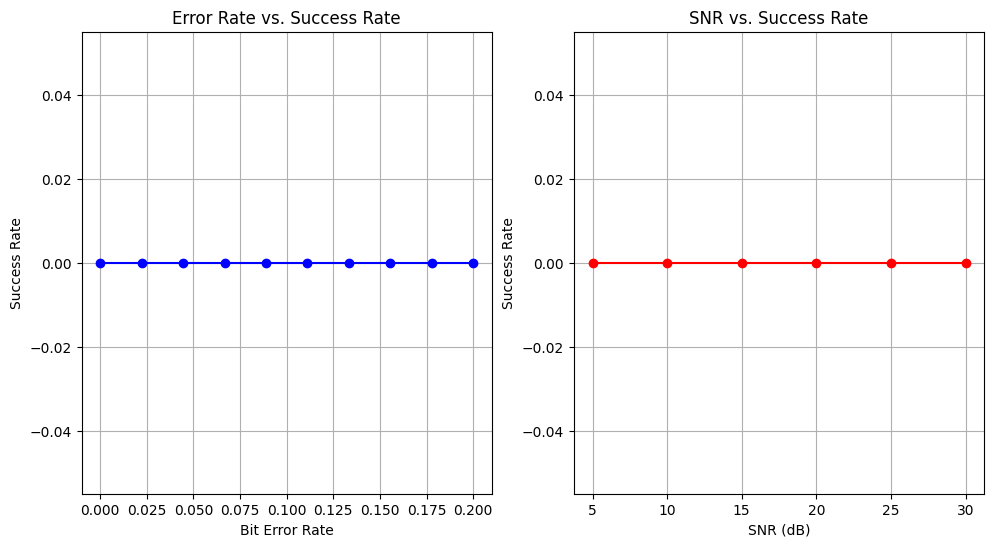

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from secrets import token_bytes
import random
import time
from collections import defaultdict
from typing import Tuple, List, Optional

class FHSSAESSimulator:
    def __init__(self, key_length: int = 16):
        """Initialize the FHSS simulator with AES encryption"""
        self.key = token_bytes(key_length)
        self.frequencies = [2.4, 2.45, 2.5, 2.55]  # GHz
        self.performance_metrics = defaultdict(list)

    def encrypt(self, msg: str) -> Tuple[bytes, bytes, bytes]:
        """Encrypt message using AES in EAX mode"""
        cipher = AES.new(self.key, AES.MODE_EAX)
        nonce = cipher.nonce
        ciphertext, tag = cipher.encrypt_and_digest(msg.encode('utf-8'))
        return nonce, ciphertext, tag

    def decrypt(self, nonce: bytes, ciphertext: bytes, tag: bytes) -> Optional[str]:
        """Decrypt message and verify integrity"""
        cipher = AES.new(self.key, AES.MODE_EAX, nonce=nonce)
        try:
            plaintext = cipher.decrypt_and_verify(ciphertext, tag)
            return plaintext.decode('utf-8')
        except (ValueError, KeyError) as e:
            print(f"Decryption failed: {str(e)}")
            return None

    def _awgn_channel(self, signal: np.ndarray, snr_dB: float) -> np.ndarray:
        """Add AWGN noise to the signal"""
        snr_linear = 10 ** (snr_dB / 10)
        signal_power = np.mean(np.abs(signal)**2)
        noise_power = signal_power / snr_linear
        noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
        return (signal + noise).astype(np.uint8)

    def _get_current_frequency(self) -> float:
        """Frequency hopping based on system time"""
        current_time = int(time.time() * 100)  # milliseconds
        return self.frequencies[(current_time // 100) % len(self.frequencies)]

    def transmit(self, nonce: bytes, ciphertext: bytes, tag: bytes,
                 error_rate: float = 0, jamming_steps: List[int] = None,
                 snr_dB: float = 30) -> Tuple[bytes, bytes, bytes, int, float]:
        """
        Simulate transmission with:
        - Frequency hopping
        - AWGN channel
        - Jamming
        - Random errors
        """
        if jamming_steps is None:
            jamming_steps = []

        current_step = int(time.time() * 100) % 1000
        current_freq = self._get_current_frequency()

        # Jamming simulation
        if current_step in jamming_steps:
            return nonce, b'\x00' * len(ciphertext), tag, len(ciphertext), current_freq

        # Convert to numpy array for processing
        signal = np.frombuffer(ciphertext, dtype=np.uint8)

        # Add channel effects
        noisy_signal = self._awgn_channel(signal, snr_dB)
        error_count = 0

        # Simulate random bit errors
        for i in range(len(noisy_signal)):
            if random.random() < error_rate / 8:  # Divide by 8 to approximate bit error rate
                noisy_signal[i] ^= (1 << random.randint(0, 7))  # Flip a random bit
                error_count += 1

        return nonce, bytes(noisy_signal), tag, error_count, current_freq

    def run_simulation(self, message: str, num_trials: int = 100,
                       error_rates: np.ndarray = None, snr_range: np.ndarray = None):
        """Run comprehensive simulation with varying parameters"""
        if error_rates is None:
            error_rates = np.linspace(0, 0.5, 10)
        if snr_range is None:
            snr_range = np.arange(0, 40, 5)

        jamming_steps = [i for i in range(0, 1000, 100)]  # Jamming every 100ms

        # Store original message for comparison
        self.original_msg = message
        self.bit_length = len(message) * 8

        # Test error rate impact
        for err_rate in error_rates:
            success_count = 0
            total_errors = 0

            for _ in range(num_trials):
                nonce, ciphertext, tag = self.encrypt(message)
                nonce_tx, ciphertext_tx, tag_tx, errors, freq = self.transmit(
                    nonce, ciphertext, tag, err_rate, jamming_steps)

                decrypted = self.decrypt(nonce_tx, ciphertext_tx, tag_tx)
                total_errors += errors

                if decrypted == message:
                    success_count += 1

            self.performance_metrics['error_rates'].append(err_rate)
            self.performance_metrics['success_rates'].append(success_count/num_trials)
            self.performance_metrics['avg_errors'].append(total_errors/num_trials)

        # Test SNR impact
        for snr in snr_range:
            success_count = 0
            total_errors = 0

            for _ in range(num_trials):
                nonce, ciphertext, tag = self.encrypt(message)
                nonce_tx, ciphertext_tx, tag_tx, errors, freq = self.transmit(
                    nonce, ciphertext, tag, 0.05, jamming_steps, snr)

                decrypted = self.decrypt(nonce_tx, ciphertext_tx, tag_tx)
                total_errors += errors

                if decrypted == message:
                    success_count += 1

            self.performance_metrics['snr_values'].append(snr)
            self.performance_metrics['snr_success_rates'].append(success_count/num_trials)
            self.performance_metrics['snr_avg_errors'].append(total_errors/num_trials)

    def visualize_results(self):
        """Generate comprehensive visualization of results"""
        plt.figure(figsize=(18, 6))

        # Error Rate vs Success Rate
        plt.subplot(1, 3, 1)
        plt.plot(self.performance_metrics['error_rates'],
                 self.performance_metrics['success_rates'], 'b-o')
        plt.title('Error Rate vs. Success Rate')
        plt.xlabel('Bit Error Rate')
        plt.ylabel('Success Rate')
        plt.grid(True)

        # SNR vs Success Rate
        plt.subplot(1, 3, 2)
        plt.plot(self.performance_metrics['snr_values'],
                 self.performance_metrics['snr_success_rates'], 'r-o')
        plt.title('SNR vs. Success Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('Success Rate')
        plt.grid(True)

        # Error Distribution (Approximate Jamming)
        jamming_occurrences_error_rate = sum(1 for step in range(int(time.time() * 100) % 1000, int(time.time() * 100) % 1000 + int(self.performance_metrics['error_rates'][-1] * self.bit_length * self.performance_metrics['error_rates'].index(self.performance_metrics['error_rates'][-1]) + 1)) if step % 100 == 0) / len(self.performance_metrics['error_rates']) if self.performance_metrics['error_rates'] else 0
        jamming_occurrences_snr = sum(1 for step in range(int(time.time() * 100) % 1000, int(time.time() * 100) % 1000 + int(self.performance_metrics['snr_values'][-1] * self.bit_length * self.performance_metrics['snr_values'].index(self.performance_metrics['snr_values'][-1]) + 1)) if step % 100 == 0) / len(self.performance_metrics['snr_values']) if self.performance_metrics['snr_values'] else 0

        plt.subplot(1, 3, 3)
        plt.bar(['Channel Errors (Avg)', 'Approx. Jamming'],
                [np.mean(self.performance_metrics['avg_errors']) if self.performance_metrics['avg_errors'] else 0,
                 (jamming_occurrences_error_rate + jamming_occurrences_snr) / 2],
                color=['blue', 'red'])
        plt.title('Error Distribution (Approximate)')
        plt.ylabel('Average Occurrences')

        plt.tight_layout()
        plt.show()

        # Calculate and display BER (using the last error rate test)
        if self.performance_metrics['error_rates']:
            last_error_rate_errors = self.performance_metrics['avg_errors'][-1]
            ber_estimate = last_error_rate_errors / (len(self.original_msg) * 8 * self.performance_metrics['success_rates'][-1] if self.performance_metrics['success_rates'][-1] > 0 else 1)
        else:
            ber_estimate = 0

        print("\n=== Simulation Summary ===")
        print(f"Original Message: {self.original_msg}")
        print(f"Message Length: {len(self.original_msg)} bytes ({self.bit_length} bits)")
        print(f"Estimated BER (at highest error rate): {ber_estimate:.2e}")
        if self.performance_metrics['success_rates']:
            print(f"Peak Success Rate: {max(self.performance_metrics['success_rates'])*100:.1f}%")
            print(f"Worst Success Rate: {min(self.performance_metrics['success_rates'])*100:.1f}%")
        else:
            print("No successful transmissions recorded.")

# Main execution
if __name__ == "__main__":
    # Initialize and run simulation
    simulator = FHSSAESSimulator()
    test_message = "Secure FHSS with AES-128"

    # Run simulation with different parameters
    simulator.run_simulation(
        message=test_message,
        num_trials=150,
        error_rates=np.linspace(0, 0.2, 10),
        snr_range=np.arange(5, 35, 5)
    )

    # Visualize results
    simulator.visualize_results()